<a href="https://colab.research.google.com/github/bilalsarimeseli/Data_Science_For_Science/blob/main/Neural_Networks_in_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **NEURAL NETWORKS IN PREDICTION**

In this notebook, we will use a neural network to forecast housing prices. By executing a train/test division and evaluating performance against linear regression models, we can gain insights into the subtleties and improvements in accuracy achievable with more advanced models.

In [2]:
#Within this code cell, we import the essential packages, highlighting the extensive utilization of
#the scikit-learn library for various machine learning functionalities.

In [1]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import LinearRegression

### Dataset Description

We'll be using a dataset from the scikit-learn datasets page that has information on housing prices in California. You can explore the dataset at the following link:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [2]:
# Load the California housing dataset
california_housing = fetch_california_housing()

# Extract features ('X') and target variable ('y')
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.DataFrame(california_housing.target, columns=["Target"])

# Display the first few rows of the features DataFrame
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
### Let's do some simple data exploration.

X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [4]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [5]:
X.size

165120

In [9]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Combine latitude, longitude, and house age into a new DataFrame
df = pd.concat([X[['Latitude', 'Longitude']], pd.DataFrame({'HouseAge': X['HouseAge']})], axis=1)

# Sort the DataFrame by 'HouseAge' in ascending order to get the oldest houses first
df = df.sort_values(by='HouseAge')

# Create a base map centered at a specific location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]  # Center the map on the average coordinates
my_map = folium.Map(location=map_center, zoom_start=10)

# Create a heatmap to represent the age of the houses
HeatMap(data=df[['Latitude', 'Longitude', 'HouseAge']].values.tolist(), radius=15).add_to(my_map)

# Display the map in the notebook
display(my_map)


<Axes: >

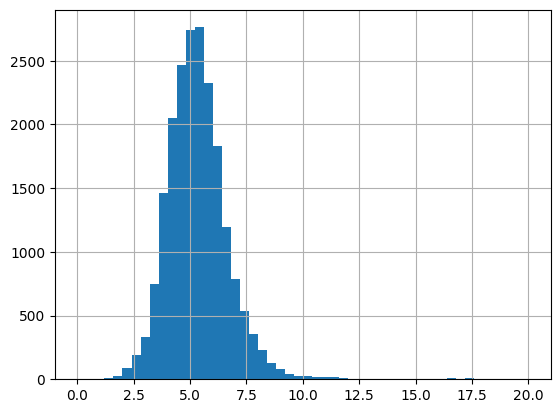

In [12]:
### We can take a look at the average number of rooms with a histogram.

X.iloc[:, 2].hist(bins = 50, range=(0, 20))

<Axes: >

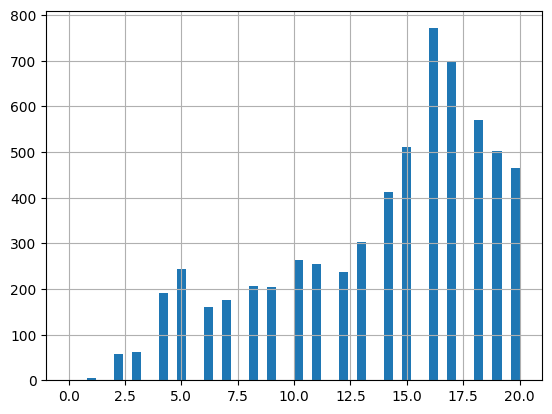

In [6]:
### We can take a look at the house ages with a histogram.

X.iloc[:, 1].hist(bins = 50, range=(0, 20))

(array([ 877., 3612., 4099., 3771., 2799., 1769., 1239.,  752.,  479.,
        1243.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

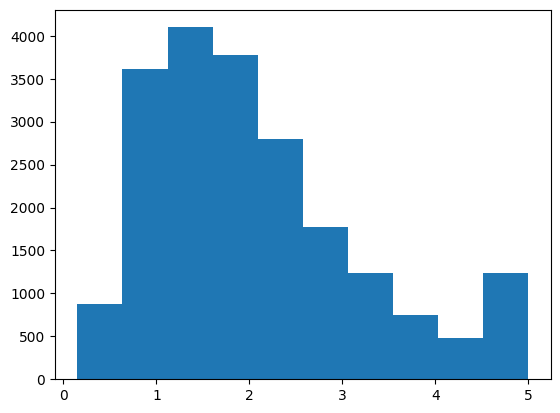

In [7]:
### In this cell, we look at a histogram of the target variable.

plt.hist(y)

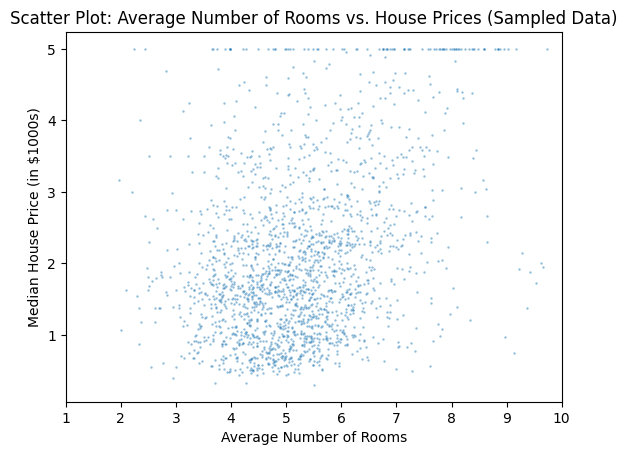

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's compare the average number of rooms to house prices to see the correlation.
avg_rooms = X.iloc[:, 2]

# Sample a fraction of the data to reduce density
sample_fraction = 0.1
sampled_data = pd.concat([avg_rooms, y], axis=1).sample(frac=sample_fraction, random_state=42)

# Scatter plot with sampled data
sns.scatterplot(x=sampled_data.iloc[:, 0], y=sampled_data.iloc[:, 1].values.flatten(), s=3, alpha=0.5)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Price (in $1000s)')
plt.title('Scatter Plot: Average Number of Rooms vs. House Prices (Sampled Data)')

# Set the x-axis range to 1-10 rooms
plt.xlim(1, 10)

plt.show()


In [24]:
### In order to assess the accuracy of our model, we will perform a train/test split.
### By default, scikit-learn uses a 75/25 split.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [25]:
### Next, we'll scale the feature space so the range of each feature is comparable.
### To do this, we will first fit a scaler to the train set and then use it to transform
###both the train and test set. When using a model in the real world, we assume that we don't know
### the actual test set, so we can't fit a seperate scaler on the set specifically.

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
### In this cell, we create a standard multi-layer perceptron regressor.
### This is a simple neural network model that is standard in scikit-learn.
### We increase the maximum iterations to 100000 to ensure convergence.

reg = MLPRegressor(random_state=0, max_iter = 100000)

In [27]:
### Next, we fit the model on the train set.

reg.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(max_iter=100000, random_state=0)

In [28]:
### We can quickly test the r2 score on the test set.

reg.score(X_test_scaled, y_test)

0.7561204847945122

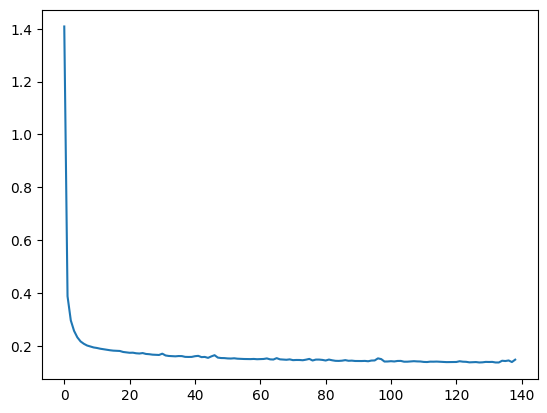

In [29]:
### Training loss over time

plt.plot(reg.loss_curve_)

In [30]:
### There are many paramaters we can tune to increase performance.
### In this notebook, we'll change the learning rate and test performance on a cross-validation set.
### This is an example of hyper-paramater tuning.

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [31]:
### In this cell, we iterate through different learning rates to examine perfomance on the validation set.


learning_rates = [0.0001, 0.001, 0.01, 1, 10]

for i in learning_rates:
    reg = MLPRegressor(random_state=0, max_iter = 10000, learning_rate_init = i)
    reg.fit(X_train_scaled,y_train)
    print("Learning Rate:", i, "Score", reg.score(X_val_scaled, y_val))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 0.0001 Score 0.7479170081401665


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 0.001 Score 0.747090868283373


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 0.01 Score 0.7703191849351456


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 1 Score -821.4282393448357


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Learning Rate: 10 Score -699.2798272041284


In [32]:
### We can see that a good score comes with an inital learning rate of 0.0001.
### Let's analyze the performance on the hold-out set.

reg = MLPRegressor(random_state=0, max_iter = 10000, learning_rate_init = 0.0001)
reg.fit(X_train_scaled,y_train)
print("Score on hold-out set", reg.score(X_test_scaled, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score on hold-out set 0.761616756115709


In [33]:
### Let's try 0.01.
### Let's analyze the performance on the hold-out set.

reg = MLPRegressor(random_state=0, max_iter = 10000, learning_rate_init = 0.01)
reg.fit(X_train_scaled,y_train)
print("Score on hold-out set", reg.score(X_test_scaled, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score on hold-out set 0.7809970610380164


In [34]:
### Finally, let's compare the score to that of linear regression.

reg = LinearRegression()
reg.fit(X_train_scaled, y_train)
reg.score(X_test_scaled, y_test)

0.589533271208224

In [35]:
# We got the best result as 0.78 when learning rate is 0.01. Linear Regression gave 0.59. So, NN improved the result.